### Step 1: Import all Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step 2 : Import the Dataset

In [ ]:
from google.colab import files
files.upload()

Saving insurance.csv to insurance (1).csv


{'insurance (1).csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,sou

In [ ]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
'''
BMI = Weight(kg) / (Height)(m))^2

Ideal BMI = Between 18.5 and 24.9
'''

'\nBMI = Weight(kg) / (Height)(m))^2\n\nIdeal BMI = Between 18.5 and 24.9\n'

### Step 3 : Analyze the Dataset

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Step 4 : Feature Engineering

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Step 4.1 : Creating New Features

I have created these New Features

1. bmi_category from bmi
2. age group from age
3. High risk flag from bmi and smoker
4. is_parent from childer
5. charges_per_child from children and charges

In [ ]:
#NEW COLUMN : BMI_CATEGORY

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df.insert(3 , 'bmi_category', df['bmi'].apply(categorize_bmi))

In [ ]:
df

,age,sex,bmi,bmi_category,children,smoker,region,charges
0,19,female,27.900,Overweight,0,yes,southwest,16884.92400
1,18,male,33.770,Obese,1,no,southeast,1725.55230
2,28,male,33.000,Obese,3,no,southeast,4449.46200
3,33,male,22.705,Normal,0,no,northwest,21984.47061
4,32,male,28.880,Overweight,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,Obese,3,no,northwest,10600.54830
1334,18,female,31.920,Obese,0,no,northeast,2205.98080
1335,18,female,36.850,Obese,0,no,southeast,1629.83350
1336,21,female,25.800,Overweight,0,no,southwest,2007.94500


In [ ]:
df['age'].value_counts()

,count
age,
18,69
19,68
46,29
52,29
50,29
47,29
48,29
51,29
45,29


In [ ]:
#NEW COLUMN : AGE_GROUP

df.insert(1, 'age group', pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 65],          #pd.cut() is a function in pandas used to divide continuous numerical data into bins (categories or ranges).
                         labels=['Young', 'Adult', 'Mid-age', 'Senior', 'Elderly']) )   #labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Syntax : pd.cut(x, bins, right=True, labels=None, include_lowest=False)

# Parameters:
'''
x: The input array or Series to be binned.
bins: The number of bins or the exact bin edges (list of numbers).
right: Whether the bins include the right edge (default is True).
labels: Labels for the resulting bins.
include_lowest: Whether the first interval should include the lowest value.
'''
df

,age,age group,sex,bmi,bmi_category,children,smoker,region,charges
0,19,Young,female,27.900,Overweight,0,yes,southwest,16884.92400
1,18,Young,male,33.770,Obese,1,no,southeast,1725.55230
2,28,Adult,male,33.000,Obese,3,no,southeast,4449.46200
3,33,Adult,male,22.705,Normal,0,no,northwest,21984.47061
4,32,Adult,male,28.880,Overweight,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,Senior,male,30.970,Obese,3,no,northwest,10600.54830
1334,18,Young,female,31.920,Obese,0,no,northeast,2205.98080
1335,18,Young,female,36.850,Obese,0,no,southeast,1629.83350
1336,21,Young,female,25.800,Overweight,0,no,southwest,2007.94500


In [ ]:
#NEW COULMN : HIGH RISK FLAG

# Clean column names
df.columns = df.columns.str.strip().str.lower() #clear spaces if any and convert letters to lowercase to avaoid case sensitive error

df.insert(8, 'High_risk_flag', ((df['bmi'] >= 30) & (df['smoker'] == 'yes')).astype(int) )

In [ ]:
df

,age,age group,sex,bmi,bmi_category,children,smoker,region,High_risk_flag,charges
0,19,Young,female,27.900,Overweight,0,yes,southwest,0,16884.92400
1,18,Young,male,33.770,Obese,1,no,southeast,0,1725.55230
2,28,Adult,male,33.000,Obese,3,no,southeast,0,4449.46200
3,33,Adult,male,22.705,Normal,0,no,northwest,0,21984.47061
4,32,Adult,male,28.880,Overweight,0,no,northwest,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,Senior,male,30.970,Obese,3,no,northwest,0,10600.54830
1334,18,Young,female,31.920,Obese,0,no,northeast,0,2205.98080
1335,18,Young,female,36.850,Obese,0,no,southeast,0,1629.83350
1336,21,Young,female,25.800,Overweight,0,no,southwest,0,2007.94500


In [ ]:
df[df['High_risk_flag'] == 1]

,age,age group,sex,bmi,bmi_category,children,smoker,region,High_risk_flag,charges
14,27,Adult,male,42.130,Obese,0,yes,southeast,1,39611.75770
19,30,Adult,male,35.300,Obese,0,yes,southwest,1,36837.46700
23,34,Adult,female,31.920,Obese,1,yes,northeast,1,37701.87680
29,31,Adult,male,36.300,Obese,2,yes,southwest,1,38711.00000
30,22,Young,male,35.600,Obese,0,yes,southwest,1,35585.57600
...,...,...,...,...,...,...,...,...,...,...
1300,45,Mid-age,male,30.360,Obese,0,yes,southeast,1,62592.87309
1301,62,Elderly,male,30.875,Obese,3,yes,northwest,1,46718.16325
1308,25,Young,female,30.200,Obese,0,yes,southwest,1,33900.65300
1313,19,Young,female,34.700,Obese,2,yes,southwest,1,36397.57600


In [ ]:
#NEW COLUMN : IS_PARENT
df.insert(6, 'is_parent', df['children'].apply(lambda x: 1 if x > 0 else 0))

In [ ]:
df

,age,age group,sex,bmi,bmi_category,children,is_parent,smoker,region,High_risk_flag,charges
0,19,Young,female,27.900,Overweight,0,0,yes,southwest,0,16884.92400
1,18,Young,male,33.770,Obese,1,1,no,southeast,0,1725.55230
2,28,Adult,male,33.000,Obese,3,1,no,southeast,0,4449.46200
3,33,Adult,male,22.705,Normal,0,0,no,northwest,0,21984.47061
4,32,Adult,male,28.880,Overweight,0,0,no,northwest,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,Senior,male,30.970,Obese,3,1,no,northwest,0,10600.54830
1334,18,Young,female,31.920,Obese,0,0,no,northeast,0,2205.98080
1335,18,Young,female,36.850,Obese,0,0,no,southeast,0,1629.83350
1336,21,Young,female,25.800,Overweight,0,0,no,southwest,0,2007.94500


In [ ]:
#Final Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             1338 non-null   int64   
 1   age group       1338 non-null   category
 2   sex             1338 non-null   object  
 3   bmi             1338 non-null   float64 
 4   bmi_category    1338 non-null   object  
 5   children        1338 non-null   int64   
 6   is_parent       1338 non-null   int64   
 7   smoker          1338 non-null   object  
 8   region          1338 non-null   object  
 9   High_risk_flag  1338 non-null   int64   
 10  charges         1338 non-null   float64 
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 106.2+ KB


#### Step 4.2 Handling Categorical Data

There are two types of Data in Categorical Data itself
1. Nominal Data ---> sex, smoker, region
2. Ordinal Data ---> age group, bmi_category,

In [ ]:
# Nomianl Data
# Using One-hot Encoding to represent them as Binary Columns

nominal_cols = ['sex', 'smoker', 'region']
df = pd.get_dummies(df, columns = nominal_cols, drop_first = True, dtype = int)

In [ ]:
df

,age,age group,bmi,bmi_category,children,is_parent,High_risk_flag,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,Young,27.900,Overweight,0,0,0,16884.92400,0,1,0,0,1
1,18,Young,33.770,Obese,1,1,0,1725.55230,1,0,0,1,0
2,28,Adult,33.000,Obese,3,1,0,4449.46200,1,0,0,1,0
3,33,Adult,22.705,Normal,0,0,0,21984.47061,1,0,1,0,0
4,32,Adult,28.880,Overweight,0,0,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,Senior,30.970,Obese,3,1,0,10600.54830,1,0,1,0,0
1334,18,Young,31.920,Obese,0,0,0,2205.98080,0,0,0,0,0
1335,18,Young,36.850,Obese,0,0,0,1629.83350,0,0,0,1,0
1336,21,Young,25.800,Overweight,0,0,0,2007.94500,0,0,0,0,1


In [ ]:
df['age group'].unique()

['Young', 'Adult', 'Senior', 'Mid-age', 'Elderly']
Categories (5, object): ['Young' < 'Adult' < 'Mid-age' < 'Senior' < 'Elderly']

In [ ]:
df['bmi_category'].unique()

array(['Overweight', 'Obese', 'Normal', 'Underweight'], dtype=object)

In [ ]:
#Ordinal Data
#Using Ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['age group', 'bmi_category']
ordinal_mapping = [
    ['Young', 'Adult', 'Mid-age', 'Senior', 'Elderly'],
    ['Underweight', 'Normal', 'Overweight', 'Obese']
]

ord_encoder = OrdinalEncoder(categories = ordinal_mapping)
df[ordinal_cols] = ord_encoder.fit_transform(df[ordinal_cols])

In [ ]:
df

,age,age group,bmi,bmi_category,children,is_parent,High_risk_flag,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,0.0,27.900,2.0,0,0,0,16884.92400,0,1,0,0,1
1,18,0.0,33.770,3.0,1,1,0,1725.55230,1,0,0,1,0
2,28,1.0,33.000,3.0,3,1,0,4449.46200,1,0,0,1,0
3,33,1.0,22.705,1.0,0,0,0,21984.47061,1,0,1,0,0
4,32,1.0,28.880,2.0,0,0,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,3.0,30.970,3.0,3,1,0,10600.54830,1,0,1,0,0
1334,18,0.0,31.920,3.0,0,0,0,2205.98080,0,0,0,0,0
1335,18,0.0,36.850,3.0,0,0,0,1629.83350,0,0,0,1,0
1336,21,0.0,25.800,2.0,0,0,0,2007.94500,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   age group         1338 non-null   float64
 2   bmi               1338 non-null   float64
 3   bmi_category      1338 non-null   float64
 4   children          1338 non-null   int64  
 5   is_parent         1338 non-null   int64  
 6   High_risk_flag    1338 non-null   int64  
 7   charges           1338 non-null   float64
 8   sex_male          1338 non-null   int64  
 9   smoker_yes        1338 non-null   int64  
 10  region_northwest  1338 non-null   int64  
 11  region_southeast  1338 non-null   int64  
 12  region_southwest  1338 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 136.0 KB


### Step 5 : Separate Dependent & Independent Variables from the Dataset

In [ ]:
x = df.drop(columns = ['charges'])
y = df['charges']

### Step 6 : Split data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

print(f"Training Shape : {x_train.shape}")
print(f"Testing Shape : {x_test.shape}")

Training Shape : (1070, 12)
Testing Shape : (268, 12)


### Step 7 : Model Building

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)

model.fit(x_train, y_train)

Ridge()

In [ ]:
#Make Predictions
y_pred = model.predict(x_test)

results = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
results

,Actual,Predicted
764,9095.06825,11520.527577
887,5272.17580,6794.889820
890,29330.98315,28403.668382
1293,9301.89355,10118.350518
259,33750.29180,35435.306018
...,...,...
109,47055.53210,47265.041255
575,12222.89830,12718.414117
535,6067.12675,8075.628025
543,63770.42801,46564.596766


### Step 8 : Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MSE: 19898419.22909582
RMSE: 4460.764422057706
R² Score: 0.8718287805775069


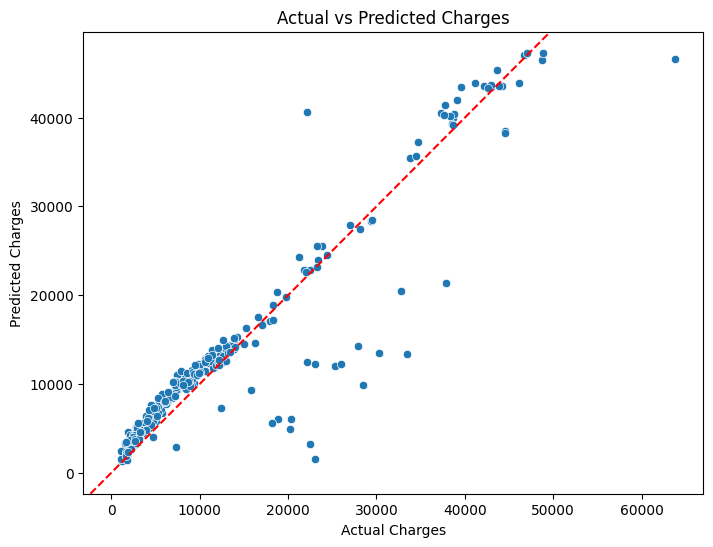

In [ ]:
#Scatter Plot (Actual vs. Predicted Values)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.axline([0, 0], [1, 1], color='red', linestyle="--")  # 45-degree reference line
plt.show()

### Step 9 : Predictions on Unseen data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   age group         1338 non-null   float64
 2   bmi               1338 non-null   float64
 3   bmi_category      1338 non-null   float64
 4   children          1338 non-null   int64  
 5   is_parent         1338 non-null   int64  
 6   High_risk_flag    1338 non-null   int64  
 7   charges           1338 non-null   float64
 8   sex_male          1338 non-null   int64  
 9   smoker_yes        1338 non-null   int64  
 10  region_northwest  1338 non-null   int64  
 11  region_southeast  1338 non-null   int64  
 12  region_southwest  1338 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 136.0 KB


In [ ]:
import pandas as pd

# Suppose new_data_dict contains your unseen data row(s)
new_data_dict = {
    'age': [30],
    'age group': [2.0],
    'bmi': [25.3],
    'bmi_category': [1.0],
    'children': [1],
    'is_parent': [1],
    'High_risk_flag': [0],
    'charges': [0],  # If charges is the target variable, exclude or set to 0
    'sex_male': [1],
    'smoker_yes': [0],
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
}

unseen_df = pd.DataFrame(new_data_dict)


# Drop target variable if present
x_new = unseen_df.drop(columns=['charges'])


# Make predictions
predictions = model.predict(x_new)
print(predictions)


[4148.25372723]


### Step 10 : Save the Model

In [ ]:
import joblib

# Suppose your trained model is named 'model'
joblib.dump(model, 'model.pkl')


['model.pkl']

In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>